# Stroke Prediction Dataset

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?datasetId=1120859&sortBy=voteCount

In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [401]:
raw_data = pd.read_csv("D:/ML files/MADE_2sem/ML in prod/Tais-S/data/raw/healthcare-dataset-stroke-data.csv")
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Attribute Information:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [171]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [172]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


В датасете имеются как численные, так и категориальные признаки, а также частично неизвестные данные.

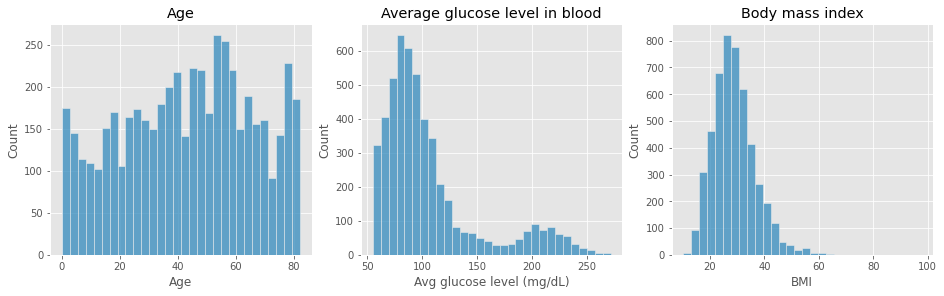

In [173]:
def plot_hist(col, title, xlabel, ax, bins=30):
    sns.histplot(col, bins=bins,ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
                  
fig, axes = plt.subplots(1, 3, figsize=(13, 4), constrained_layout=True)

plot_hist(raw_data["age"], title="Age", xlabel="Age", ax=axes[0])

plot_hist(raw_data["avg_glucose_level"], title="Average glucose level in blood", 
          xlabel="Avg glucose level (mg/dL)", ax=axes[1])

plot_hist(raw_data["bmi"], title="Body mass index", xlabel="BMI", ax=axes[2])

plt.show()

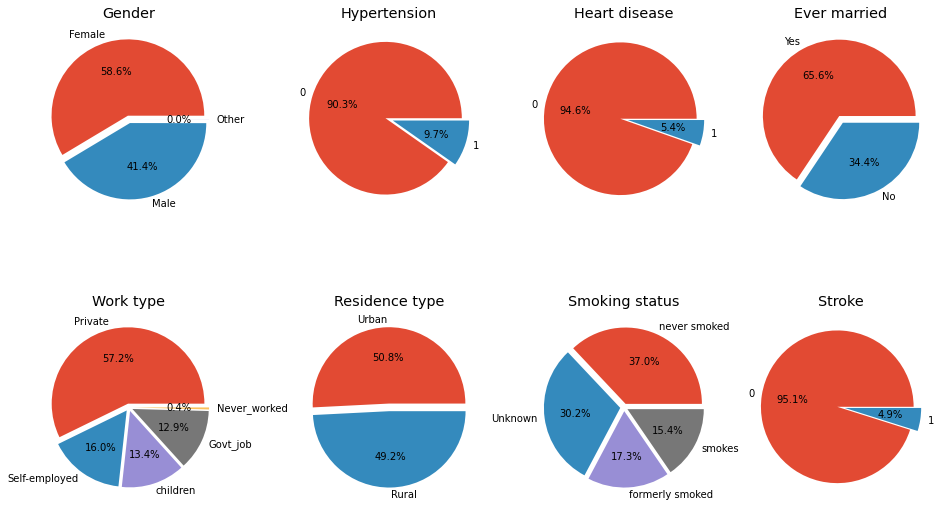

In [174]:
def plot_pie(col, title, ax):
    col_value_cnt = col.value_counts()
    labels = col_value_cnt.keys()
    ax.pie(x=col_value_cnt, autopct="%.1f%%", explode=[0.05]*len(col_value_cnt), labels=labels)
    ax.set_title(title)

fig, axes = plt.subplots(2, 4, figsize=(13, 8), constrained_layout=True)

plot_pie(raw_data["gender"], "Gender", ax=axes[0,0])
plot_pie(raw_data["hypertension"], "Hypertension", ax=axes[0,1])
plot_pie(raw_data["heart_disease"], "Heart disease", ax=axes[0,2])
plot_pie(raw_data["ever_married"], "Ever married", ax=axes[0,3])
plot_pie(raw_data["work_type"], "Work type", ax=axes[1,0])
plot_pie(raw_data["Residence_type"], "Residence type", ax=axes[1,1])
plot_pie(raw_data["smoking_status"], "Smoking status", ax=axes[1,2])
plot_pie(raw_data["stroke"], "Stroke", ax=axes[1,3])

plt.show()

Примечательно, что данные несбалансированны, так как доля людей, у которых случался инсульт, чрезвычайно мала, поэтому следует учитывать это при обработке данных.

<AxesSubplot:>

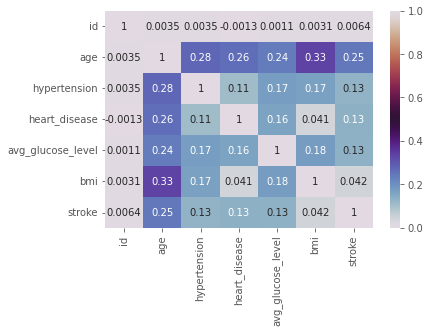

In [252]:
sns.heatmap(raw_data.corr(), cmap="twilight", annot=True)

<AxesSubplot:xlabel='age', ylabel='stroke'>

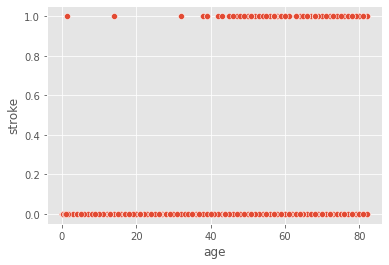

In [277]:
sns.scatterplot(data=raw_data, x="age", y="stroke")

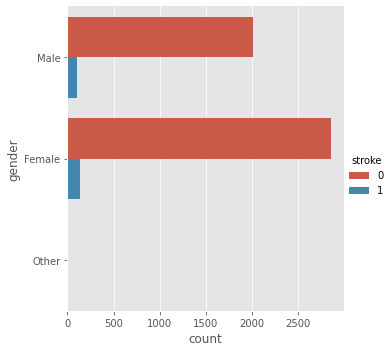

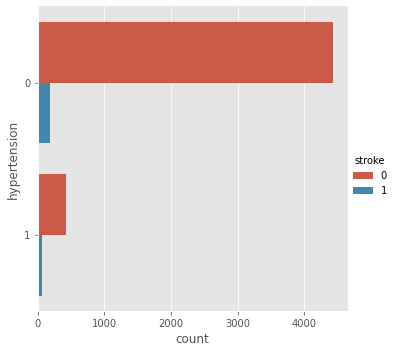

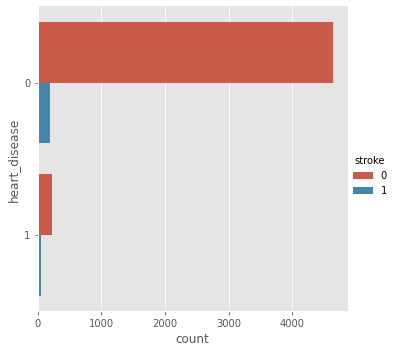

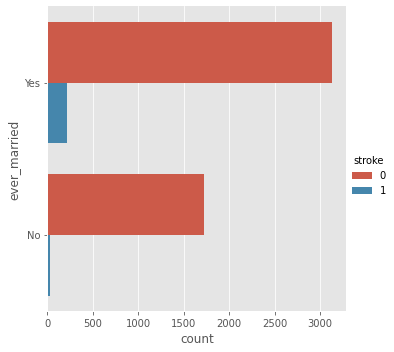

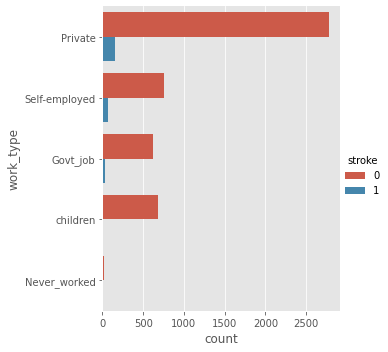

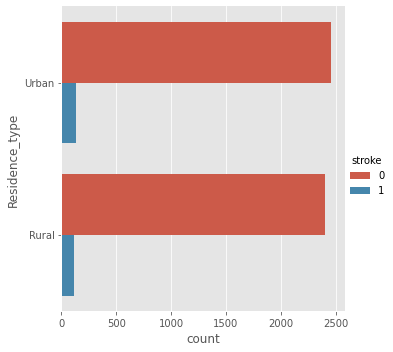

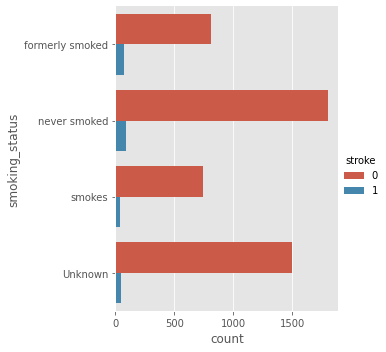

In [269]:
for col in ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]:
    sns.catplot(y=col, hue="stroke", kind="count", data=raw_data)

## Прототип модели

In [412]:
from sklearn.model_selection import train_test_split

df, test_df = train_test_split(raw_data, test_size=0.2, random_state=2022)
test_df = test_df.drop("stroke", 1)
df.to_csv("D:/ML files/MADE_2sem/ML in prod/Tais-S/data/raw/train_df.csv", index=False)
test_df.to_csv("D:/ML files/MADE_2sem/ML in prod/Tais-S/data/raw/test_df.csv", index=False)

In [413]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


def build_categorical_pipeline():
    categorical_pipeline = Pipeline(
        [
            ("impute", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
            ("ohe", OneHotEncoder()),
        ]
    )
    return categorical_pipeline


def build_numerical_pipeline():
    numerical_pipeline = Pipeline(
        [
            ("impute", SimpleImputer(missing_values=np.nan, strategy="median")),
            ("scale", StandardScaler())
        ]
    )
    return numerical_pipeline


def build_transformer(categorical_features, numerical_features):
    transformer = ColumnTransformer(
        [
            (
                "categorical_pipeline",
                build_categorical_pipeline(),
                categorical_features
            ),
            (
                "numerical_pipeline",
                build_numerical_pipeline(),
                numerical_features
            ),
        ]
    )
    return transformer


def make_features(transformer, df):
    return transformer.transform(df)


def split_train_val_data(df):
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=2022)
    return train_df, val_df

In [415]:
from sklearn.metrics import accuracy_score, confusion_matrix


def train_model(model, features, target):
    model.fit(features, target)
    return model


def predict_model(model, features):
    predictions = model.predict(features)
    return predictions


def evaluate_model(predictions, target):
    acc_score = accuracy_score(target, predictions)
    tn, fp, fn, tp = confusion_matrix(target, predictions, labels=[0, 1]).ravel()
    false_negative_rate = fn / (tp + fn)
    return {"accuracy": acc_score,
            "false_negative_rate": false_negative_rate}


def create_inference_pipeline(model, transformer):
    return Pipeline([("features_part", transformer), ("model_part", model)])

In [416]:
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

In [421]:
from imblearn.over_sampling import SMOTE

def full_pipeline(m):
    train_df, val_df = split_train_val_data(df)

    train_target = train_df["stroke"]
    train_df = train_df.drop("stroke", 1)
    train_df = train_df.drop("id", 1)

    val_target = val_df["stroke"]
    val_df = val_df.drop("stroke", 1)
    val_df = val_df.drop("id", 1)

    transformer = build_transformer(categorical_features, numerical_features)
    transformer.fit(train_df)
    train_features = make_features(transformer, train_df)
    train_features, train_target = SMOTE().fit_resample(train_features, train_target)

    model = train_model(m, train_features, train_target)

    inference_pipeline = create_inference_pipeline(model, transformer)
    predictions = predict_model(inference_pipeline, val_df)
    metrics = evaluate_model(predictions, val_target)
    return metrics

In [422]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [KNeighborsClassifier(n_neighbors=20), 
          RandomForestClassifier(max_depth=10, n_estimators=300),
          SVC(kernel="sigmoid", gamma=0.001, C=100)]

for m in models:
    score = full_pipeline(m)
    print(m, score, "\n")

KNeighborsClassifier(n_neighbors=20) {'accuracy': 0.7200488997555012, 'false_negative_rate': 0.3157894736842105} 

RandomForestClassifier(max_depth=10, n_estimators=300) {'accuracy': 0.8960880195599022, 'false_negative_rate': 0.7105263157894737} 

SVC(C=100, gamma=0.001, kernel='sigmoid') {'accuracy': 0.726161369193154, 'false_negative_rate': 0.18421052631578946} 



Так как при определении вероятностей возникновения различного рода болезней очень важно не упустить случаи, когда потенциально подверженному болезни человеку проставляется низкая вероятность заболеть, то при выборе модели нужно в значительной степени опираться на значение false_negative_rate. Желательно, чтобы доля подобных случаев была как можно ниже, т е чтобы false_negative_rate был как можно меньше. Поэтому из протестированных выше моделей наиболее подходящей кажется SVC(C=100, gamma=0.001, kernel='sigmoid')